In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
labels = ['T-shirt/top', 'Trouser',	'Pullover',	'Dress',	'Coat',	'Sandal',	'Shirt',	'Sneaker', 'Bag',	'Ankle boot']

x_train = np.concatenate([x_train, x_test])
y_train = np.concatenate([y_train, y_test])

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[1], 1)
y_train = np_utils.to_categorical(y_train, 10)

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.25)

print(x_train.shape, x_val.shape, x_test.shape)

[0 1 2 3 4 5 6 7 8 9]
(42000, 28, 28, 1) (14000, 28, 28, 1) (14000, 28, 28, 1)


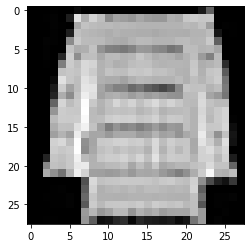

In [6]:
def showPicture(linkOrImage):
  if type(linkOrImage) == 'str':
    img = plt.imread(linkOrImage)
    plt.imshow(img) 
  else:
    plt.imshow(linkOrImage.reshape(28, 28), cmap='gray')

showPicture(x_train[1])

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
numOfEpochs = 10
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=numOfEpochs, verbose=1)

Epoch 1/10
1313/1313 [==============================] - 64s 27ms/step - loss: 0.7721 - accuracy: 0.7701 - val_loss: 0.5062 - val_accuracy: 0.8188
Epoch 2/10
1313/1313 [==============================] - 36s 27ms/step - loss: 0.4122 - accuracy: 0.8517 - val_loss: 0.4146 - val_accuracy: 0.8491
Epoch 3/10
1313/1313 [==============================] - 36s 27ms/step - loss: 0.3524 - accuracy: 0.8723 - val_loss: 0.3475 - val_accuracy: 0.8765
Epoch 4/10
1313/1313 [==============================] - 35s 27ms/step - loss: 0.3200 - accuracy: 0.8840 - val_loss: 0.3450 - val_accuracy: 0.8756
Epoch 5/10
1313/1313 [==============================] - 36s 27ms/step - loss: 0.2964 - accuracy: 0.8920 - val_loss: 0.3368 - val_accuracy: 0.8794
Epoch 6/10
1313/1313 [==============================] - 35s 27ms/step - loss: 0.2774 - accuracy: 0.8987 - val_loss: 0.3297 - val_accuracy: 0.8846
Epoch 7/10
1313/1313 [==============================] - 35s 27ms/step - loss: 0.2650 - accuracy: 0.9014 - val_loss: 0.3246 -

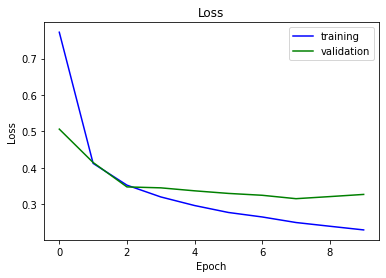

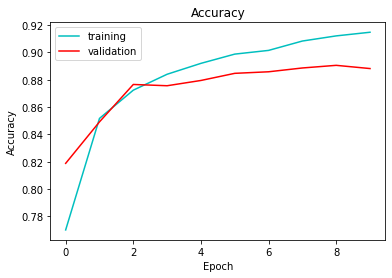

In [28]:
fig = plt.figure()
plt.plot(np.arange(0, numOfEpochs), H.history['loss'], 'b', label='training')
plt.plot(np.arange(0, numOfEpochs), H.history['val_loss'], 'g', label='validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

fig = plt.figure()
plt.plot(np.arange(0, numOfEpochs), H.history['accuracy'], 'c', label='training')
plt.plot(np.arange(0, numOfEpochs), H.history['val_accuracy'], 'r', label='validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Accuracy:  [0.3224017024040222, 0.8873571157455444]
Precision: 0.886204
Recall: 0.887654
F1 score: 0.886203
[[1262    6   31   43    3    1   62    1   12    0]
 [   1 1343    1   12    0    0    2    0    1    0]
 [  21    5 1104   13  121    0  126    0    6    0]
 [  17   23   10 1282   24    0   19    0    2    0]
 [   1    1   59   68 1183    1  136    0    2    0]
 [   0    0    0    0    0 1396    0   13    5    6]
 [ 265    6   86   50  107    0  865    0    8    0]
 [   0    0    0    0    0   34    0 1289    4   43]
 [   4    6    6    5    4    0   15    1 1331    0]
 [   0    0    0    1    1   25    0   47    4 1368]]


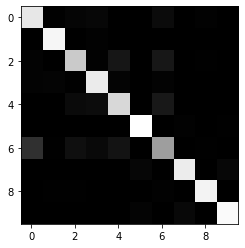

In [29]:
# 4. Đánh giá model với dữ liệu test set
from sklearn.metrics import *

accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: ', accuracy)
yhat_classes = model.predict(x_test, verbose=0)
yhat_classes = np.argmax(yhat_classes, axis = 1)
y_test_ = np.argmax(y_test, axis=1)
# predict crisp classes for test set
precision = precision_score(y_test_, yhat_classes, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_, yhat_classes, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_, yhat_classes, average='macro')
print('F1 score: %f' % f1)
plt.imshow(confusion_matrix(y_test_, yhat_classes), 'gray')
print(confusion_matrix(y_test_, yhat_classes))